<a href="https://colab.research.google.com/github/Kimtaewookdev/Sec1_project/blob/main/n411/n411_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks) 과제

In [ ]:
!pip install --upgrade xlrd

## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.

아래의 예시 생성 부분이 당장 이해 안가도 괜찮습니다. 넘파이를 활용해, 이런 다양한 일들을 할 수 있다는 점을 알아두시고, 궁금하신 분은 나중에 더 찾아보세요.

- np.append, np.vstack, np.hstack의 각각의 차이점에 대해 더 찾아보세요!

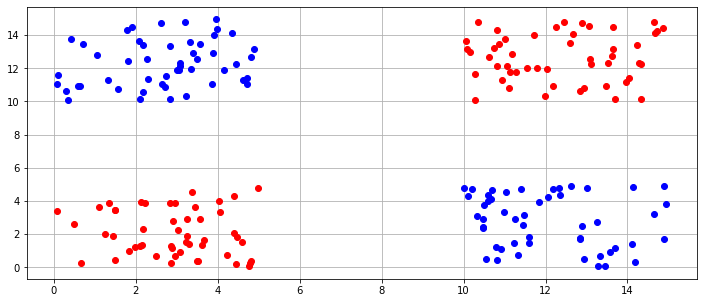

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

### 문제 1-1

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다. 이진 분류를 위한 단층 퍼셉트론을 구현하기 위해 다음 빈칸에 들어갈 내용으로 알맞은 것은?

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 1.7042 - accuracy: 0.6150
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 1.1792 - accuracy: 0.6200
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9453 - accuracy: 0.5750
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.4500
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7530 - accuracy: 0.4400
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.4050
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5250
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.4300
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.4200
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4900


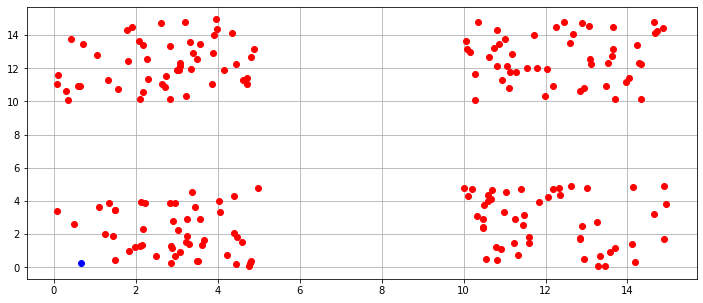

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

## 문제2. 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [3]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [4]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [5]:
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(df, df_label-1, test_size=0.2, random_state=42)

model_nn = tf.keras.Sequential(
    [
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model_nn.compile(optimizer='sgd',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model_nn.fit(x_train, y_train, epochs=500)

y_prob = model_nn.predict(x_test).flatten()
y_pred = np.where(y_prob > 0.5, 1, 0)

print(classification_report(y_test, y_pred))

Epoch 1/500
27/27 [==============================] - 1s 3ms/step - loss: 0.7590 - accuracy: 0.5134
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.7059 - accuracy: 0.5099
Epoch 3/500
27/27 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.5343
Epoch 4/500
27/27 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5470
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5447
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5633
Epoch 7/500
27/27 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.5645
Epoch 8/500
27/27 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5889
Epoch 9/500
27/27 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5970
Epoch 10/500
27/27 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.6028
Epoch 11/

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_ml = RandomForestClassifier(n_estimators=250, min_samples_leaf=3)

model_ml.fit(x_train, y_train.values.ravel())

y_pred_ml = model_ml.predict(x_test)

print(classification_report(y_test, y_pred_ml))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       119
           1       1.00      0.95      0.97        97

    accuracy                           0.98       216
   macro avg       0.98      0.97      0.98       216
weighted avg       0.98      0.98      0.98       216



---

4-1. 사용한 모델을 입력합니다. 

4-2. Accuracy를 입력합니다. 

4-3. Precision 을 입력합니다. 

4-4. Recall 을 입력합니다.

4-5. F1 score 를 입력합니다. 